### Student Information
Name: 陳奕如

Student ID:110065803

GitHub ID: Coffeeps

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [4]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [5]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [6]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [7]:
# add category to the dataframe
X['category'] = twenty_train.target

In [8]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [9]:
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [10]:
# a simple query
X[0:10][["text", "category_name"]]

,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,sci.med


In [11]:
#Answer here


# using loc (by position) since the back
X.iloc[::-20, 0:2][0:20]# using loc (by label)


,text,category
2256,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2
2236,From: dkusswur@falcon.depaul.edu (Daniel C. Ku...,1
2216,Subject: Re: Speculations From: dgraham@bmers3...,0
2196,From: kellyb@ccsua.ctstateu.edu Subject: Re: B...,0
2176,From: db7n+@andrew.cmu.edu (D. Andrew Byler) S...,3
2156,From: bohja@cnsvax.uwec.edu Subject: WITCHES A...,3
2136,From: kempmp@phoenix.oulu.fi (Petri Pihko) Sub...,0
2116,From: dufault@lftfld.enet.dec.com (MD) Subject...,2
2096,From: joel@cs.mcgill.ca (Joel MALARD) Subject:...,2
2076,From: nyeda@cnsvax.uwec.edu (David Nye) Subjec...,0


In [12]:
X.loc[::-20, 'text'][0:20]

2256    From: dyer@spdcc.com (Steve Dyer) Subject: Re:...
2236    From: dkusswur@falcon.depaul.edu (Daniel C. Ku...
2216    Subject: Re: Speculations From: dgraham@bmers3...
2196    From: kellyb@ccsua.ctstateu.edu Subject: Re: B...
2176    From: db7n+@andrew.cmu.edu (D. Andrew Byler) S...
2156    From: bohja@cnsvax.uwec.edu Subject: WITCHES A...
2136    From: kempmp@phoenix.oulu.fi (Petri Pihko) Sub...
2116    From: dufault@lftfld.enet.dec.com (MD) Subject...
2096    From: joel@cs.mcgill.ca (Joel MALARD) Subject:...
2076    From: nyeda@cnsvax.uwec.edu (David Nye) Subjec...
2056    From: eng10205@nusunix1.nus.sg (LING SIEW WEE)...
2036    From: johnsd2@rpi.edu (Dan Johnson) Subject: R...
2016    From: kmr4@po.CWRU.edu (Keith M. Ryan) Subject...
1996    Organization: Penn State University From: Andr...
1976    From: carl@SOL1.GPS.CALTECH.EDU (Carl J Lydick...
1956    From: mccool@dgp.toronto.edu (Michael McCool) ...
1936    From: vic@mmalt.guild.org (Vic Kulikauskas) Su...
1916    From: 

In [13]:
# Answer here
X.loc[lambda f: f.category_name == 'comp.graphics'].iloc[::10, :][0:5]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
43,From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...,1,comp.graphics
76,From: sts@mfltd.co.uk (Steve Sherwood (x5543))...,1,comp.graphics
107,From: samson@prlhp1.prl.philips.co.uk (Mark Sa...,1,comp.graphics
172,From: thinman@netcom.com (Technically Sweet) S...,1,comp.graphics


In [14]:
X.isnull()

,text,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2252,False,False,False
2253,False,False,False
2254,False,False,False
2255,False,False,False


In [15]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [16]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

In [17]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [18]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [19]:
# Answer here
### The isnull function looks through the entire dataset for null values and returns True wherever it finds any missing field or record.
### But it doesn't know the meaning of the missing value
#### if the dataset with `' '` , it' s not missing values
#### isnull will select the dataframe whitch is `not` [ 'id','missing_example' : 'anything you wanna write']


In [20]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

In [21]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [22]:
X = X.append(dummy_duplicate_dict, ignore_index=True)

In [23]:
sum(X.duplicated('text'))

1

In [24]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [25]:
X_sample = X.sample(n=1000) #random state

In [26]:
len(X_sample)

1000

In [27]:
X_sample[0:4]

,text,category,category_name
469,From: revc@garg.campbell.ca.us (Bob Van Cleef)...,3,soc.religion.christian
1578,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
1995,From: rcj2@cbnewsd.cb.att.com (ray.c.jender) S...,2,sci.med
1419,From: MCAVALCANTI%VORTEX.UFRGS.BR@UICVM.UIC.ED...,1,comp.graphics


# Answer here
In fact, there are nothing really change in X dataframe.
Using sampling, sample can help us to small our records. 
Every sampleing we do, we got different smaples, so we got different result.
Different size of sample also got different results.

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

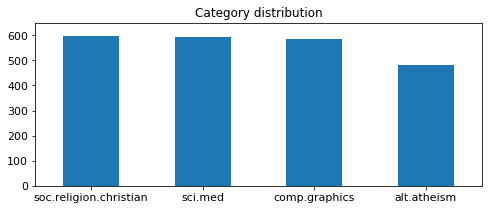

In [30]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

comp.graphics             273
sci.med                   259
soc.religion.christian    258
alt.atheism               210
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

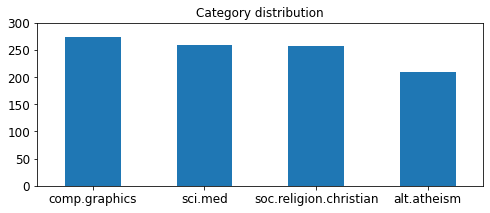

In [31]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

#rename category_name and smaple category_name to data1 & data2
data1 = X.category_name.value_counts()
data2 = X_sample.category_name.value_counts()

x = data1 + data2  # combine X and X_smple to one

In [33]:
X.index
X_sample.index
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

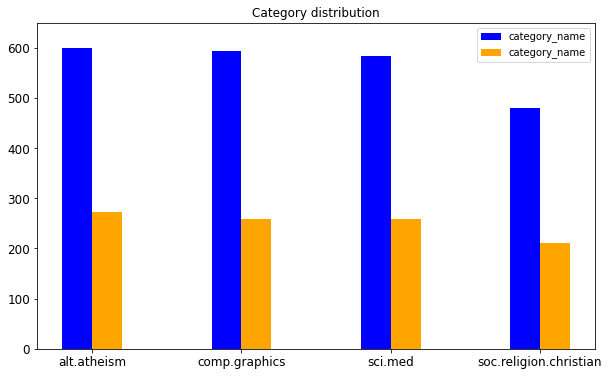

In [34]:
ax = plt.subplot()
b1 = ax.bar(x.index, data1, width=-0.2, color='b', align='edge',label = 'category_name')
b2 = ax.bar(x.index, data2, width=0.2, color='orange', align='edge',label = 'category_name')
chart = x.plot(title = 'Category distribution',ylim = [0, 650], rot = 0, fontsize = 12, figsize = (10,6))

plt.legend([b1, b2], ['category_name', 'category_name'], loc='upper right')
plt.show()



In [35]:
import nltk

In [36]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [37]:
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [39]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

In [40]:
" ".join(list(X[4:5].text))

'From: stanly@grok11.columbiasc.ncr.com (stanly) Subject: Re: Elder Brother Organization: NCR Corp., Columbia SC Lines: 15  In article <Apr.8.00.57.41.1993.28246@athos.rutgers.edu> REXLEX@fnal.gov writes: >In article <Apr.7.01.56.56.1993.22824@athos.rutgers.edu> shrum@hpfcso.fc.hp.com >Matt. 22:9-14 \'Go therefore to the main highways, and as many as you find >there, invite to the wedding feast.\'...  >hmmmmmm.  Sounds like your theology and Christ\'s are at odds. Which one am I  >to believe?  In this parable, Jesus tells the parable of the wedding feast. "The kingdom of heaven is like unto a certain king which made a marriage for his son". So the wedding clothes were customary,  and "given" to those who "chose" to attend.  This man "refused" to wear the clothes.  The wedding clothes are equalivant to the "clothes of righteousness".  When Jesus died for our sins, those "clothes" were then provided.  Like that man, it is our decision to put the clothes on. '

In [41]:
analyze(" ".join(list(X[4:5].text)))

['from',
 'stanly',
 'grok11',
 'columbiasc',
 'ncr',
 'com',
 'stanly',
 'subject',
 're',
 'elder',
 'brother',
 'organization',
 'ncr',
 'corp',
 'columbia',
 'sc',
 'lines',
 '15',
 'in',
 'article',
 'apr',
 '00',
 '57',
 '41',
 '1993',
 '28246',
 'athos',
 'rutgers',
 'edu',
 'rexlex',
 'fnal',
 'gov',
 'writes',
 'in',
 'article',
 'apr',
 '01',
 '56',
 '56',
 '1993',
 '22824',
 'athos',
 'rutgers',
 'edu',
 'shrum',
 'hpfcso',
 'fc',
 'hp',
 'com',
 'matt',
 '22',
 '14',
 'go',
 'therefore',
 'to',
 'the',
 'main',
 'highways',
 'and',
 'as',
 'many',
 'as',
 'you',
 'find',
 'there',
 'invite',
 'to',
 'the',
 'wedding',
 'feast',
 'hmmmmmm',
 'sounds',
 'like',
 'your',
 'theology',
 'and',
 'christ',
 'are',
 'at',
 'odds',
 'which',
 'one',
 'am',
 'to',
 'believe',
 'in',
 'this',
 'parable',
 'jesus',
 'tells',
 'the',
 'parable',
 'of',
 'the',
 'wedding',
 'feast',
 'the',
 'kingdom',
 'of',
 'heaven',
 'is',
 'like',
 'unto',
 'certain',
 'king',
 'which',
 'made',
 'm

In [42]:
# Answer here
analyze(" ".join(list(X[:1].text)))

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [43]:
# We can check the shape of this matrix by:
X_counts.shape

(2257, 35788)

In [44]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00',
 '000',
 '0000',
 '0000001200',
 '000005102000',
 '0001',
 '000100255pixel',
 '00014',
 '000406',
 '0007']

In [45]:
#Answer here
cv = count_vect.get_feature_names()
for i in range(0,5):
    result = np.where(X_counts[:].toarray()[i] == 1)
    result_tolist = result[0].tolist()
    for result in result_tolist:
        print(cv[result])
    print("==============")

0hb
14
8000
8565
advance
also
any
anyone
application
computer
convert
correct
do
does
ec1v
fax
format
from
good
group
hampton
host
hpgl
images
img
in
into
is
know
like
lines
london
nntp
of
organization
pc
pd
please
plotter
posting
programmer
response
same
sd345
standard
subject
tel
tga
thanks
this
tif
unit
utility
way
we
would
x3769
28
3d
algo
along
aniruddha
appreciated
as
background
body
bounded
by
cell
cool
deglurkar
dept
divine
does
doing
done
edu
else
from
get
gurus
had
has
hi
hope
how
human
if
individual
irritated
kentucky
know
lines
made
mapping
math
me
ms
my
notation
or
organization
output
patch
rectangular
region
rejected
rendered
sake
sciences
set
smaller
solve
some
somewhere
split
splitting
stay
subject
thanks
then
there
thiss
trivially
uky
university
uv
which
whole
wholly
would
15
25
63
about
accept
action
actions
affect
after
age
agency
allows
already
angry
anxiety
any
apply
ask
attention
believe
bothered
broken
building
bully
but
bytes
call
car
cause
center
check
closing


In [46]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [47]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

In [48]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [49]:
plot_x

['term_00',
 'term_000',
 'term_0000',
 'term_0000001200',
 'term_000005102000',
 'term_0001',
 'term_000100255pixel',
 'term_00014',
 'term_000406',
 'term_0007',
 'term_000usd',
 'term_0010',
 'term_001004',
 'term_0010580b',
 'term_001125',
 'term_001200201pixel',
 'term_0014',
 'term_001642',
 'term_00196',
 'term_002']

In [50]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [51]:
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [52]:
plot_z = X_counts[0:20, 0:20].toarray()

In [53]:
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

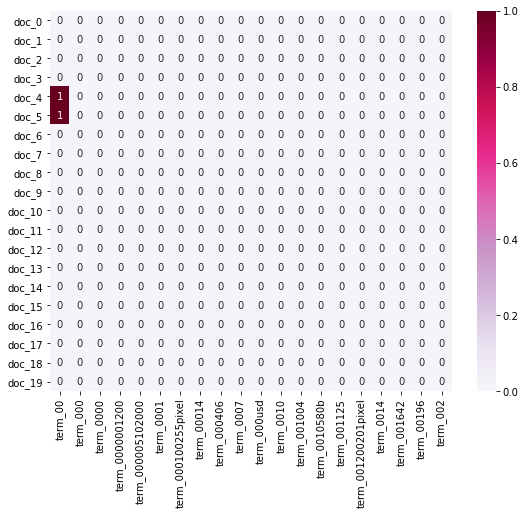

In [54]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

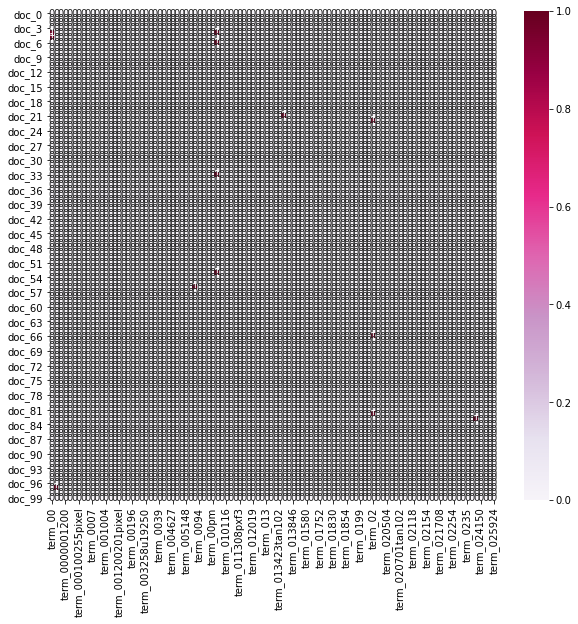

In [55]:
# Answer here
#try to use 100 articles and 100 terms
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:100]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:100]]
plot_z = X_counts[0:100, 0:100].toarray()

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 9))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [56]:
from sklearn.decomposition import PCA

In [57]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [58]:
X_reduced.shape

(2257, 2)

In [59]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

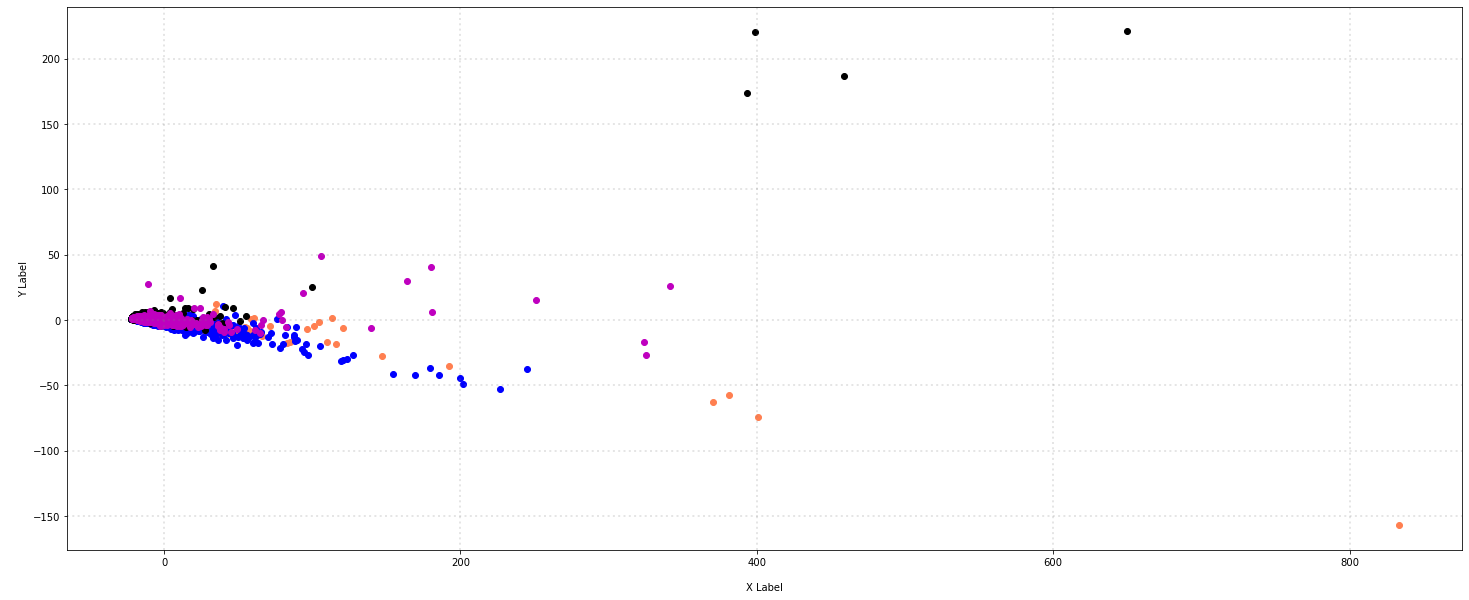

In [60]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [61]:
# Answer here
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape


(2257, 3)

In [62]:
# Answer here
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [63]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

In [64]:
X_reduced.shape

(2257, 3)

[-1.43450626  0.99652448  3.00313587]


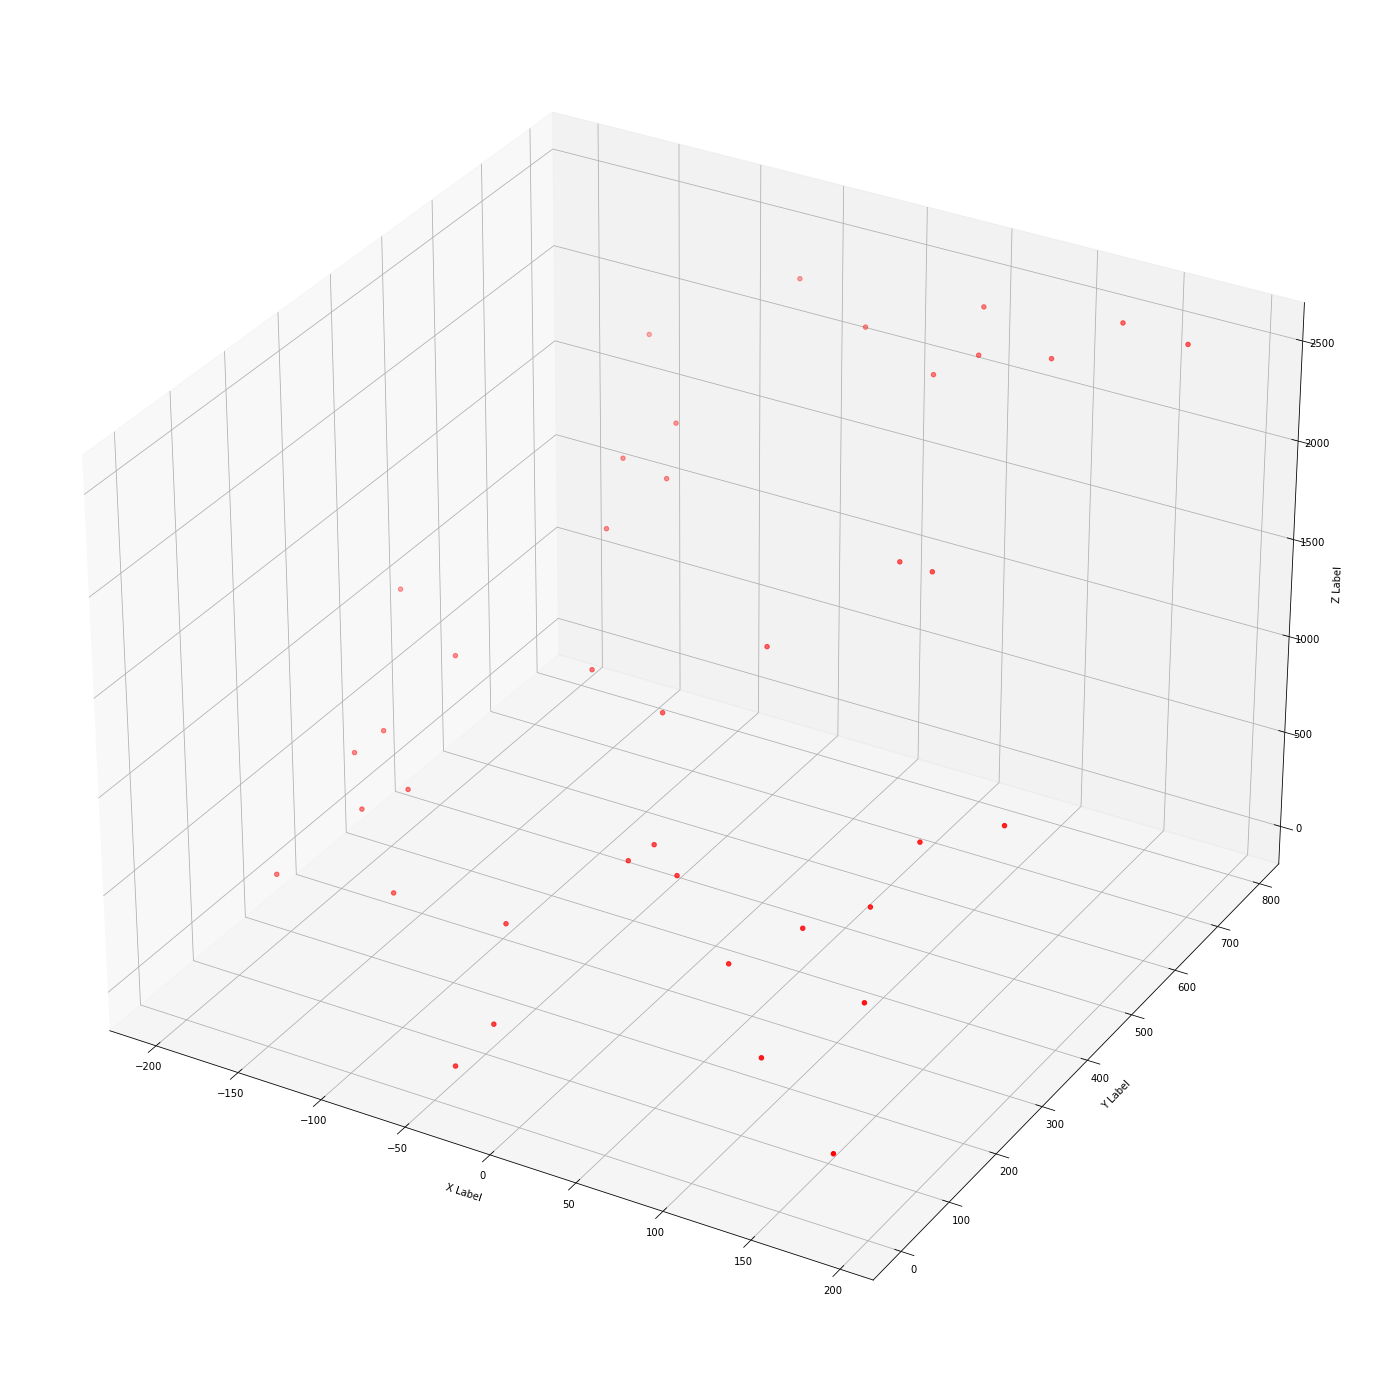

In [66]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#col = ['coral', 'blue', 'black', 'm']


# plot
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(111, projection='3d')

X1 = np.arange(-200, 200, 10) 
m = len(X1)
X2 = np.random.rand(m)*800

X = np.vstack((np.full(m, 1), X1, X2)).T

Y = X1 + 3 * X2 + 3*np.random.randn(m)

theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X), X)),
np.transpose(X)), Y)
print(theta)

M, N = np.meshgrid(X1, X2)

Z = np.array([theta[1] * d + theta[2]*p + theta[0] for d, p in zip(np.ravel(M), np.ravel(N))]).reshape(M.shape)


   

ax.scatter(X1, X2, Y, c='r')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.3)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

In [ ]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [ ]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0:]

In [ ]:
term_frequencies[0:]

In [ ]:
# Answer here
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
import plotly.express as px

fig = px.bar(x=count_vect.get_feature_names()[:300],
                y=term_frequencies[:300])
fig.show()


In [ ]:
###Exercise15
# Answer here
import numpy as np
import longtail

def random_long_tail(x):
    #magic

    value = random_long_tail(0.2)
    print(x) #outputs i.e. 0.345811242

    x = np.random.term_frequencies
longtail.plot(x)




In [ ]:
categories

In [ ]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [ ]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [ ]:
###Exercise16
#Yes, it also can be the column
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [ ]:
mlb = preprocessing.LabelBinarizer()

In [ ]:
mlb.fit(X.category)

In [ ]:
mlb.classes_

In [ ]:
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

In [ ]:
X[0:9]

In [ ]:
f = open('amazon_cells_labelled.txt', 'r')
amazon = f.read()
print(amazon)
f.close

In [ ]:
len(amazon)

In [ ]:
f = open('yelp_labelled.txt', 'r')
yelp = f.read()
print(yelp)
f.close

In [ ]:
len(yelp)

In [ ]:
f = open('imdb_labelled.txt', 'r')
imdb = f.read()
print(imdb)
f.close

In [ ]:
f = open("imdb_labelled.txt")
lines = f.readlines()
f.close()
import pandas as pd


text = []
target = []

for line in lines:
    l = line.split('\t')
    text.append(l[0])
    target.append(int(l[-1]))
    
    

d = {'text': text , 'category': target}
X = pd.DataFrame(data=d)

In [ ]:
len(text)

In [ ]:
print("\n".join(text[0].split("\n")))

In [ ]:
print(type(text))

In [ ]:
for t in text[:3]:
    print(t)